In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = pd.read_excel("results.xlsx", header=[0,1], index_col=0)

# Simulated  - Complexidade

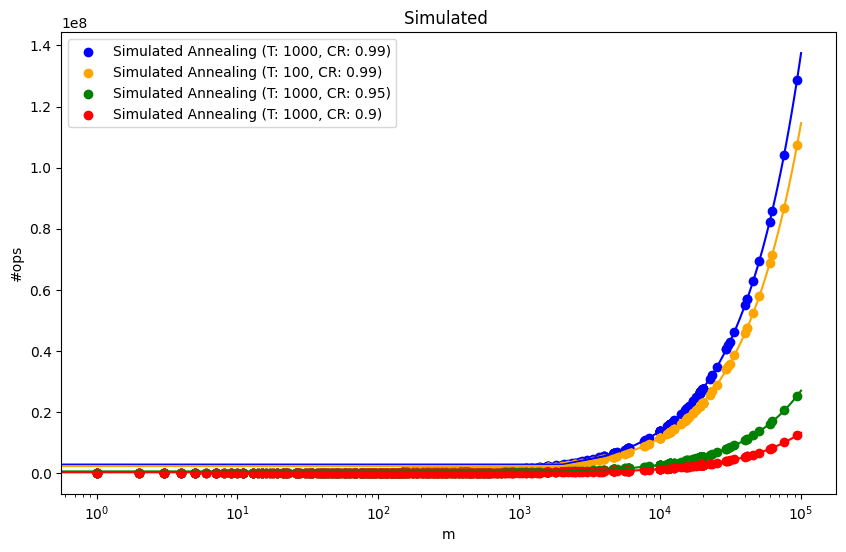

In [3]:
alg = "Simulated "
metrics = "#ops"
size = "m"
colors = ["blue", "orange", "green", "red"]

a = -1
plt.figure(figsize=(10, 6))
for h1, h2 in results.columns:
    if h2 == "#ops" and alg in h1:
        a += 1
        T = int(h1.replace(",", "").split()[3])
        CR = float(h1.replace(")", "").split()[5])

        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x, y, label=f"{h1}", color = colors[a])

        x = np.linspace(0, 10**5)
        K = np.ceil(np.log(10**-3 / T) / np.log(CR))
        y = x * K
        plt.plot(x, y, color = colors[a])
plt.title(f"{alg}")
plt.xlabel(f"{size}")
plt.ylabel(f"{metrics}")
plt.legend()
plt.xscale("log")
plt.show()

# random sol - complexidade

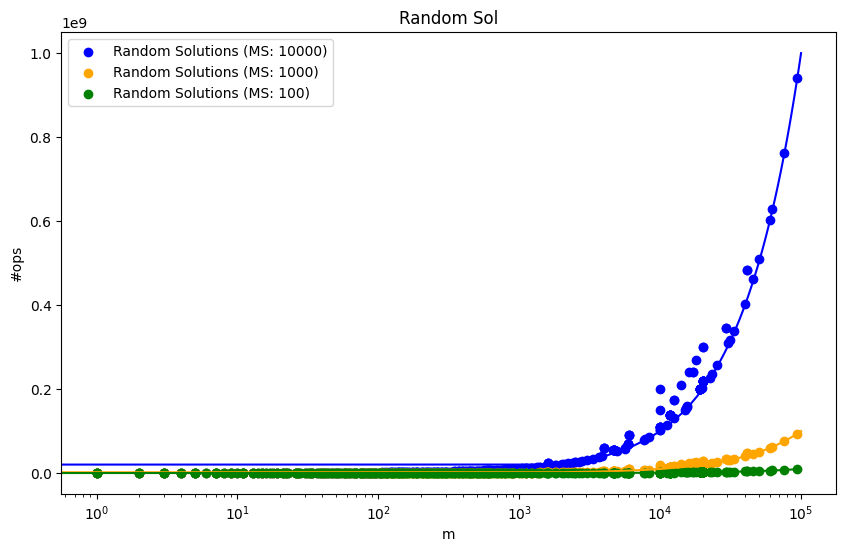

In [4]:
alg = "Random Sol"
metrics = "#ops"
size = "m"
colors = ["blue", "orange", "green", "red"]

a = -1
plt.figure(figsize=(10, 6))
for h1, h2 in results.columns:
    if h2 == "#ops" and alg in h1:
        a += 1
        MS = int(h1.replace(")", "").split()[3])

        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x, y, label=f"{h1}", color = colors[a])

        x = np.linspace(0, 10**5)
        y = MS * x 
        plt.plot(x, y, color = colors[a])
plt.title(f"{alg}")
plt.xlabel(f"{size}")
plt.ylabel(f"{metrics}")
plt.legend()
plt.xscale("log")
plt.show()

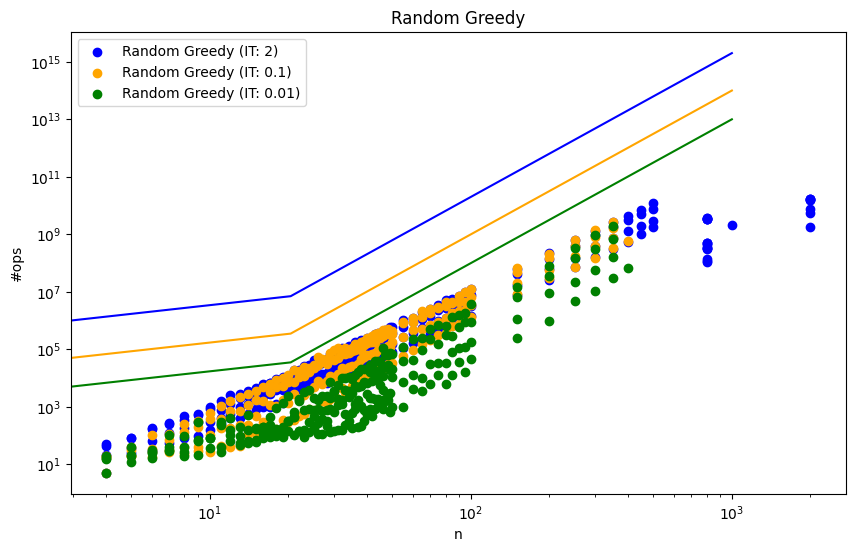

In [9]:
alg = "Random Greedy"
metrics = "#ops"
size = "n"
colors = ["blue", "orange", "green", "red"]

a = -1
plt.figure(figsize=(10, 6))
for h1, h2 in results.columns:
    if h2 == "#ops" and alg in h1:
        a += 1
        itlim = float(h1.replace(")", "").split()[3])


        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x, y, label=f"{h1}", color = colors[a])

        x = np.linspace(0, 10**3)
        y = x**5 * itlim

        plt.plot(x, y, color = colors[a])
plt.title(f"{alg}")
plt.xlabel(f"{size}")
plt.ylabel(f"{metrics}")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

# FAZER IT: 0.01 OU MENOS

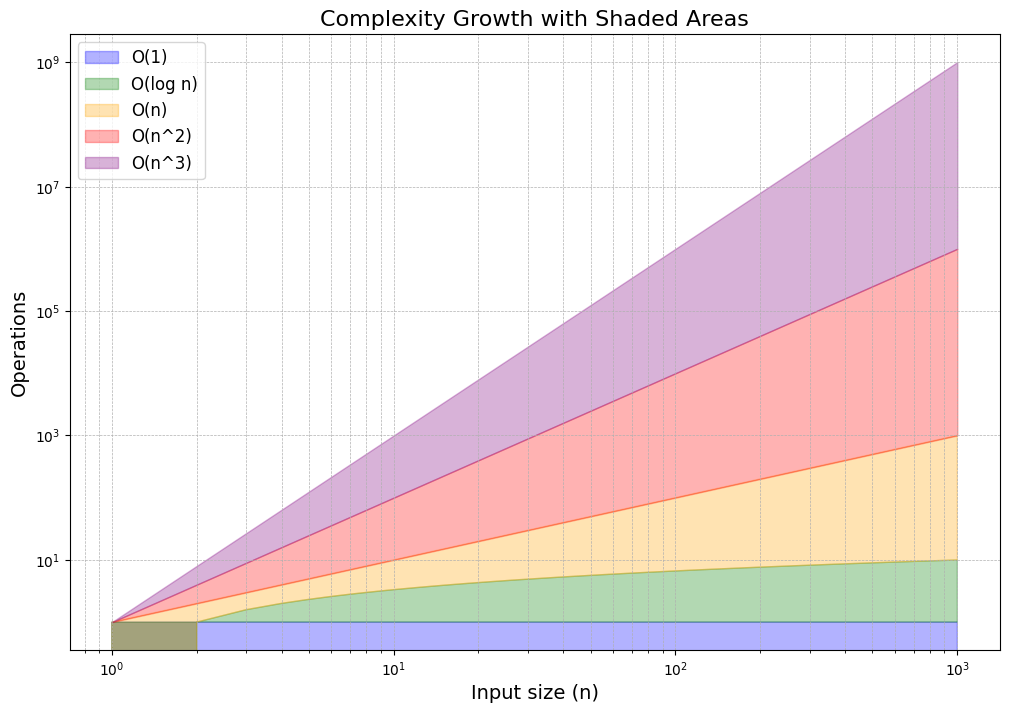

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input sizes
n = np.arange(1, 1001)  # Input size from 1 to 1000

# Define complexity functions
constant = np.ones_like(n)        # O(1)
logarithmic = np.log2(n)          # O(log n)
linear = n                        # O(n)
quadratic = n**2                  # O(n^2)
cubic = n**3                      # O(n^3)

# Create the plot
plt.figure(figsize=(12, 8))

# Fill areas between curves
plt.fill_between(n, 0, constant, alpha=0.3, label="O(1)", color="blue")
plt.fill_between(n, constant, logarithmic, alpha=0.3, label="O(log n)", color="green")
plt.fill_between(n, logarithmic, linear, alpha=0.3, label="O(n)", color="orange")
plt.fill_between(n, linear, quadratic, alpha=0.3, label="O(n^2)", color="red")
plt.fill_between(n, quadratic, cubic, alpha=0.3, label="O(n^3)", color="purple")

# Customize the plot
plt.xscale('log')  # Logarithmic scale for x-axis
plt.yscale('log')  # Logarithmic scale for y-axis
plt.xlabel("Input size (n)", fontsize=14)
plt.ylabel("Operations", fontsize=14)
plt.title("Complexity Growth with Shaded Areas", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()


# AJUSTAR REGRESSOES AUTMATOCIAS